# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
filename = 'lut.py'
if not os.path.exists(filename) :
    r = requests.get(url + filename, allow_redirects=True)
    open(filename, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

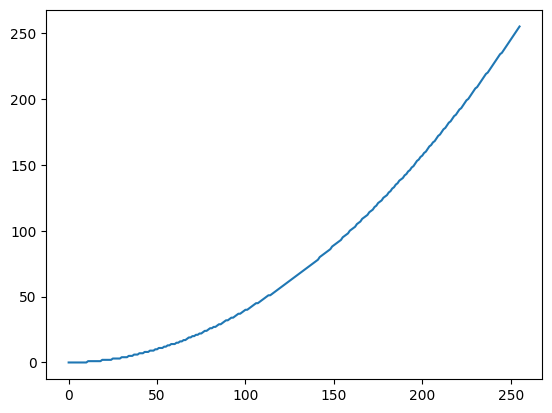

In [3]:
import lut

plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [4]:
filename = 'lena.bmp'
if not os.path.exists(filename) :
    r = requests.get(url + filename, allow_redirects=True)
    open(filename, 'wb').write(r.content)

filename = 'jet.bmp'
if not os.path.exists(filename) :
    r = requests.get(url + filename, allow_redirects=True)
    open(filename, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

In [5]:
def render_image(image_gs, colspace="grey"):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image_gs, cmap=colspace)
  plt.show()

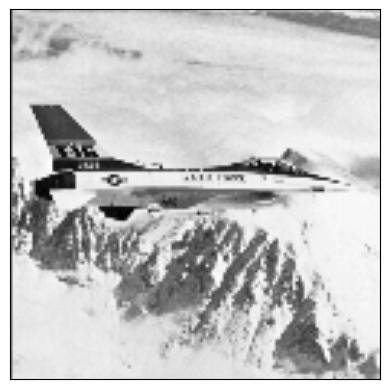

In [6]:
filename = "jet.bmp"
jet_image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
cv2.LUT(jet_image, lut.kwadratowa)
render_image(jet_image)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [7]:
def render_image_lut(image_gs, lut_fn=lut.kwadratowa):
  fig, axs = plt.subplots(1, 3)
  fig.set_figwidth(14)

  axs[0].set_title("Funkcja transformacji")
  axs[0].plot(lut_fn)

  axs[1].set_title("Wejściowy obraz")
  axs[1].set_xticks([])
  axs[1].set_yticks([])
  axs[1].imshow(image_gs, cmap="grey")

  axs[2].set_title("Przekształcony obraz")
  axs[2].set_xticks([])
  axs[2].set_yticks([])
  transformed_image_gs = cv2.LUT(image_gs, lut_fn)
  axs[2].imshow(transformed_image_gs, cmap="grey")

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

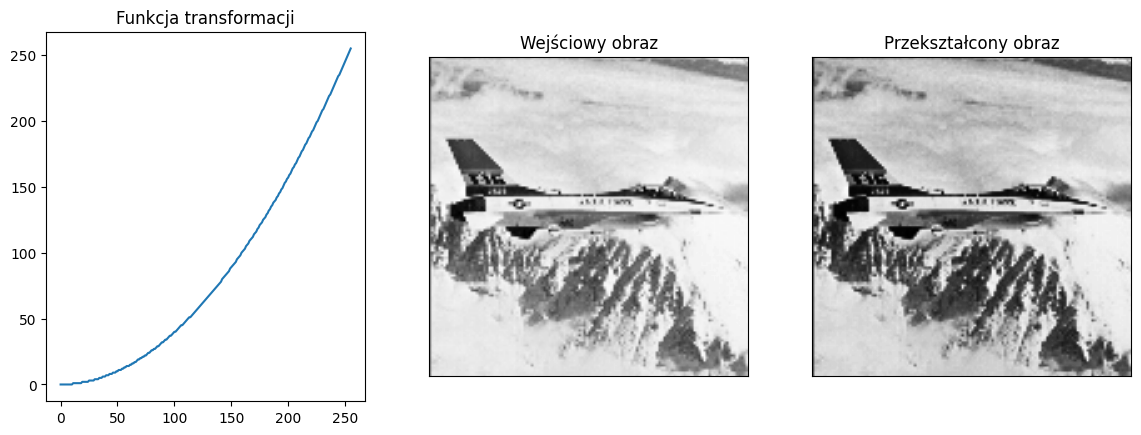

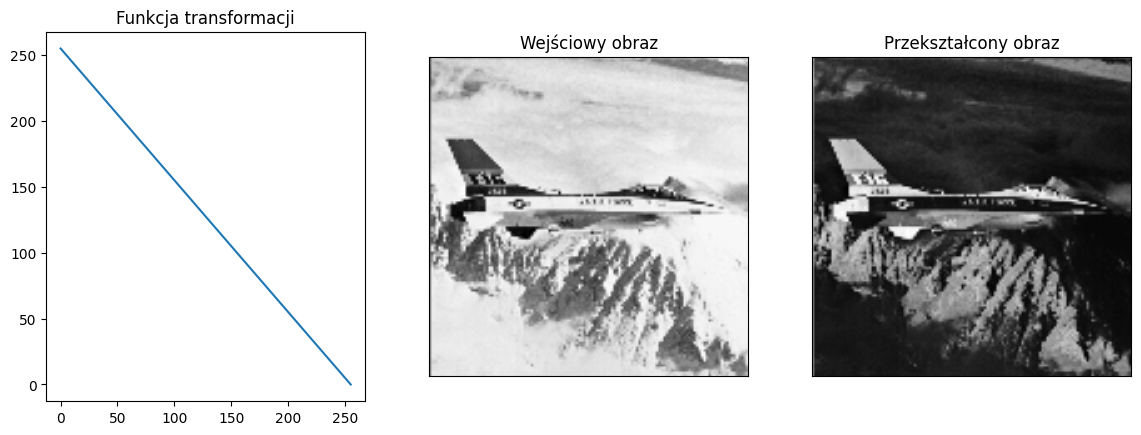

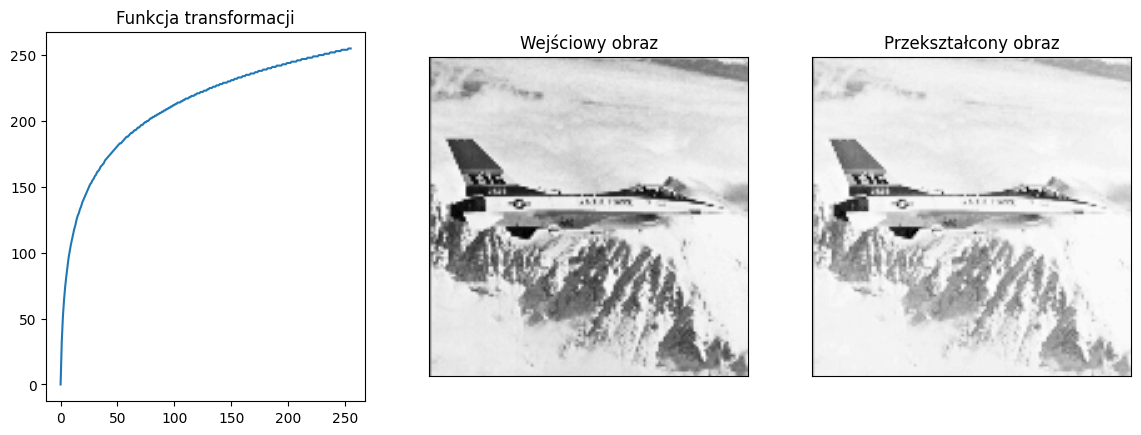

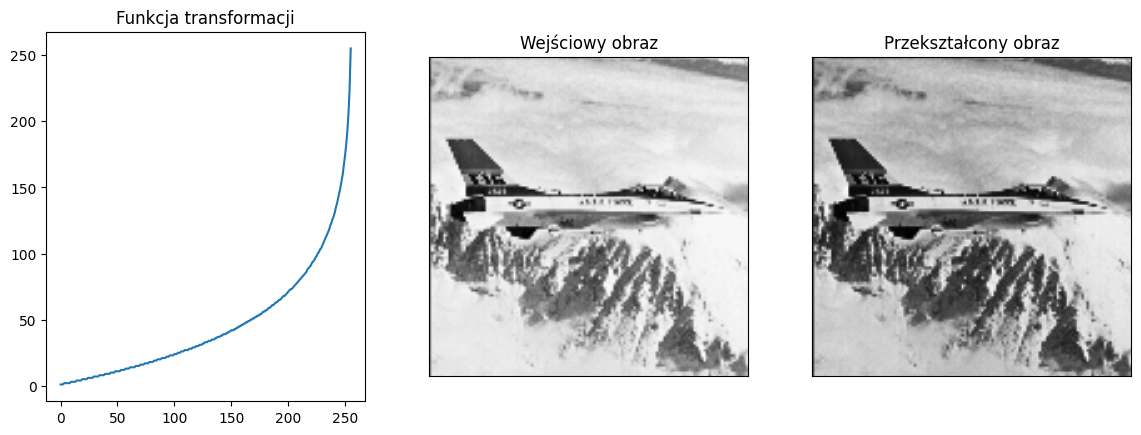

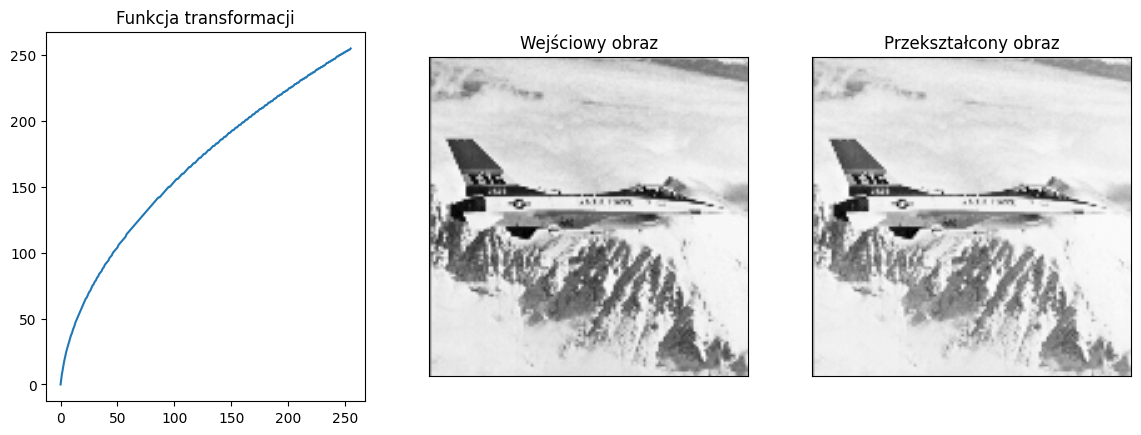

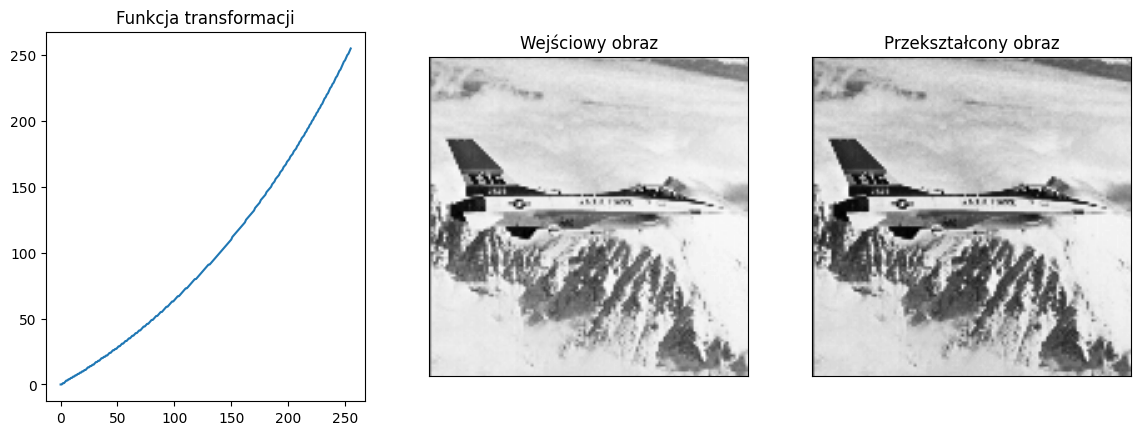

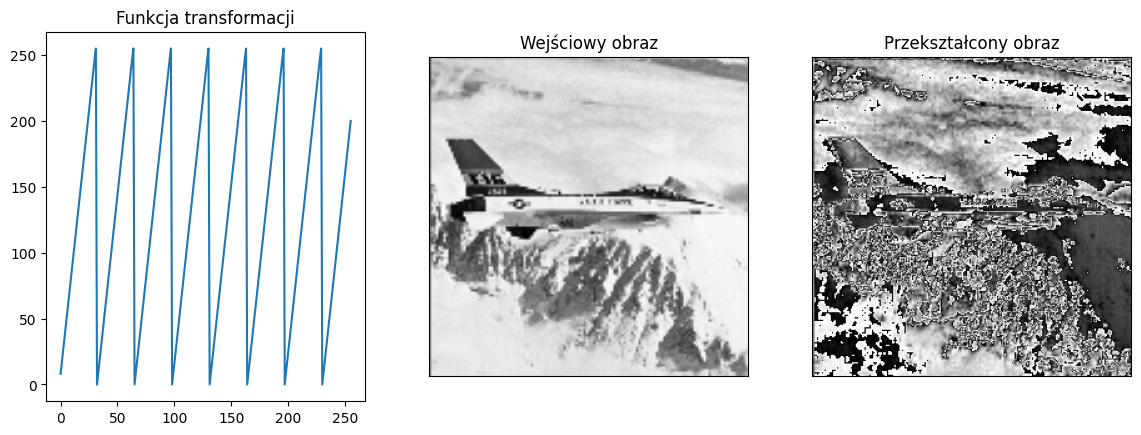

In [8]:
jet_image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)

render_image_lut(jet_image, lut.kwadratowa)
render_image_lut(jet_image, lut.odwrotna)
render_image_lut(jet_image, lut.log)
render_image_lut(jet_image, lut.odwlog)
render_image_lut(jet_image, lut.pierwiastkowa)
render_image_lut(jet_image, lut.wykladnicza)
render_image_lut(jet_image, lut.pila)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

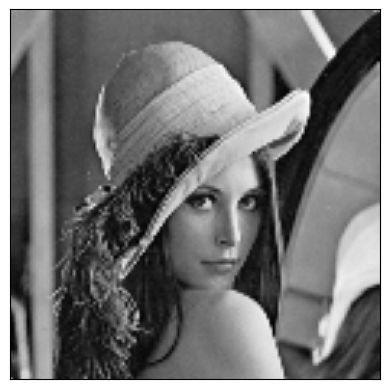

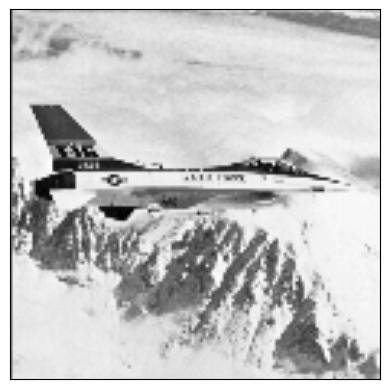

In [9]:
filename = "lena.bmp"
lena_image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
render_image(lena_image)

render_image(jet_image)

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

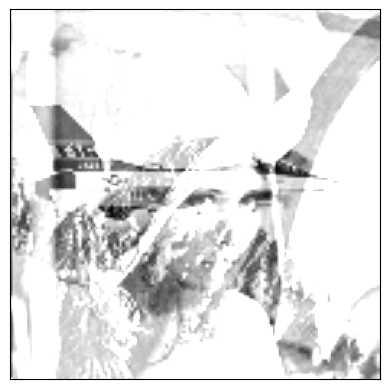

In [10]:
render_image(cv2.add(lena_image, jet_image))

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

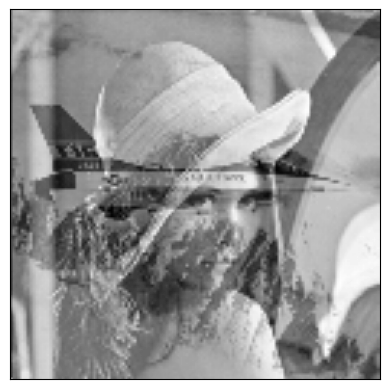

In [11]:
transformed_image = cv2.add(lena_image.astype("uint16"), jet_image.astype("uint16"))
max_value = transformed_image.max()
render_image((transformed_image.astype("float32") / max_value * 255).astype("uint8"))

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

In [12]:
def render_image_weighted(alpha, beta, gamma):
  transformed_image = cv2.addWeighted(lena_image, alpha, jet_image, beta, gamma)
  render_image(transformed_image)

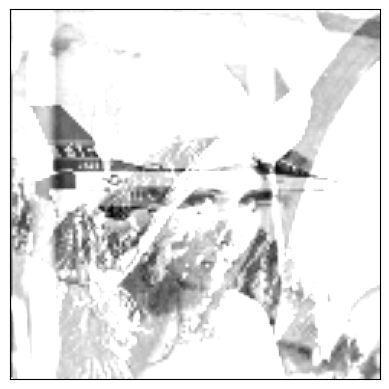

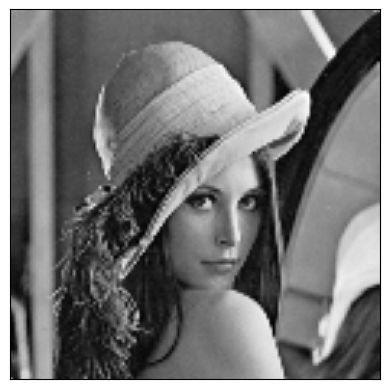

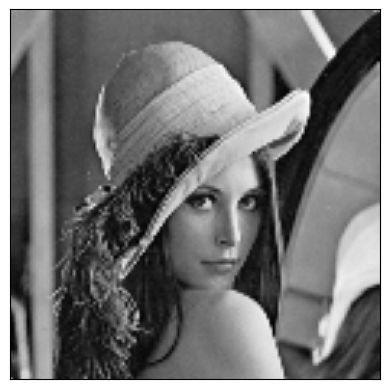

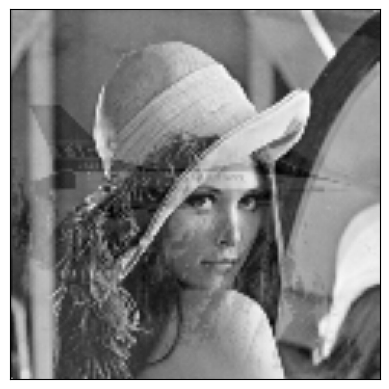

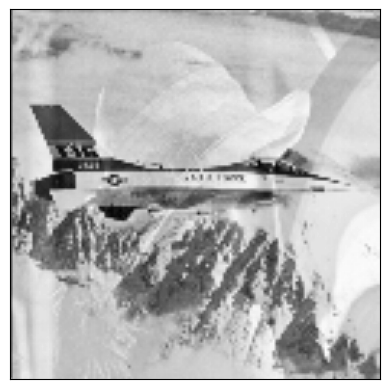

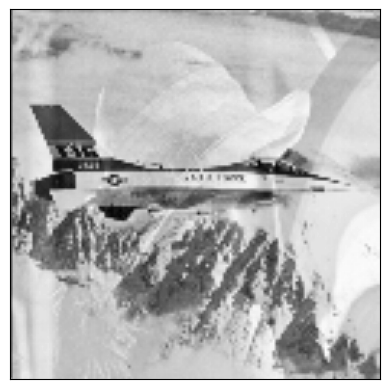

In [13]:
render_image_weighted(1, 1, 1)
render_image_weighted(1, 0, 1)
render_image_weighted(1, 0, 0)
render_image_weighted(0.75, 0.25, 0)
render_image_weighted(0.2, 0.9, 1)
render_image_weighted(0.2, 0.9, 0)


### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

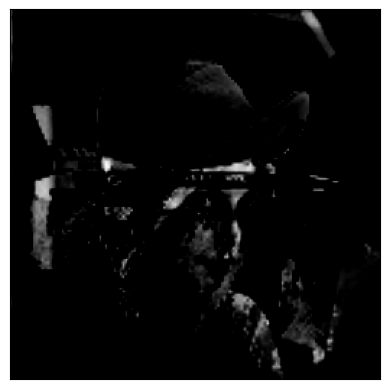

In [14]:
render_image(cv2.subtract(lena_image, jet_image))

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

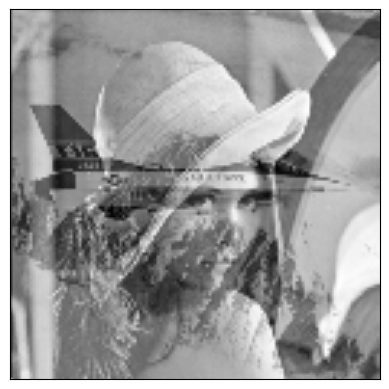

In [15]:
transformed_image = np.abs(cv2.add(lena_image.astype("int16"), jet_image.astype("int16")))
render_image(transformed_image)

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

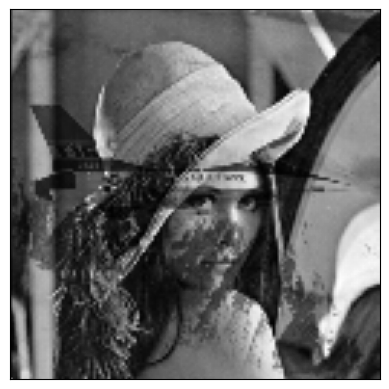

In [16]:
transformed_image = cv2.multiply(lena_image.astype("float64"), jet_image.astype("float64"))
max_value = transformed_image.max()
render_image((transformed_image / max_value * 255).astype("uint8"))

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [17]:
filename = 'kolo.bmp'
if not os.path.exists(filename) :
    r = requests.get(url + filename, allow_redirects=True)
    open(filename, 'wb').write(r.content)

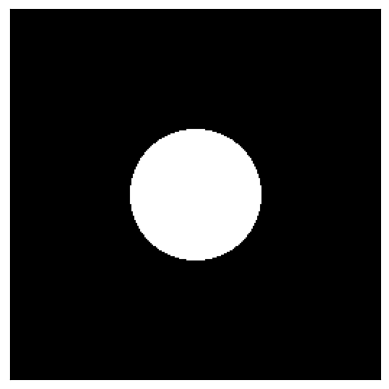

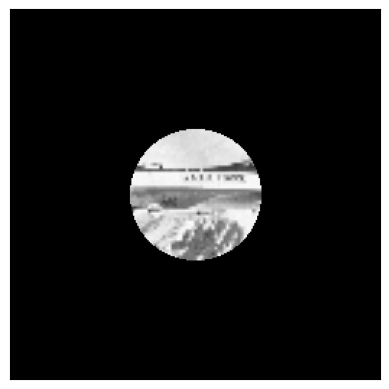

In [18]:
mask = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
mask = mask.astype("bool").astype("uint8")
render_image(mask)

render_image(cv2.multiply(jet_image, mask))

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

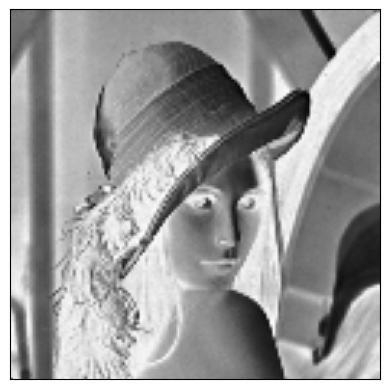

In [19]:
render_image(cv2.bitwise_not(lena_image))

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [20]:
filename = 'kwadrat.bmp'
if not os.path.exists(filename) :
    r = requests.get(url + filename, allow_redirects=True)
    open(filename, 'wb').write(r.content)

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

In [21]:
filename = "kwadrat.bmp"
square_image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
square_image = square_image.astype("bool").astype("uint8")

filename = "kolo.bmp"
circle_image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
circle_image = circle_image.astype("bool").astype("uint8")

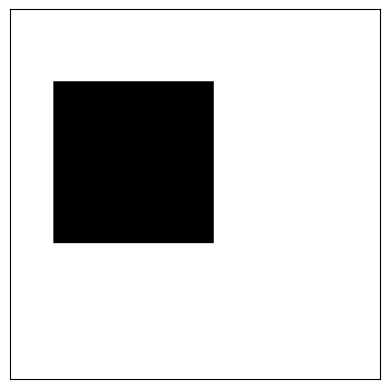

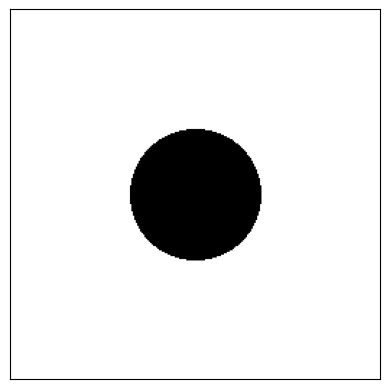

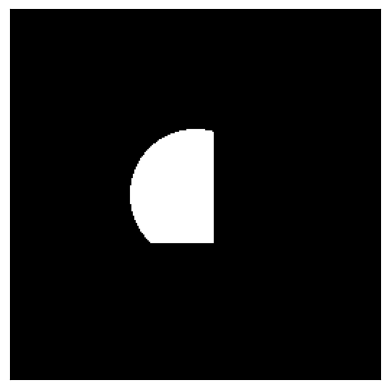

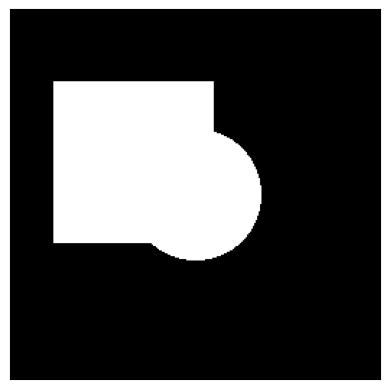

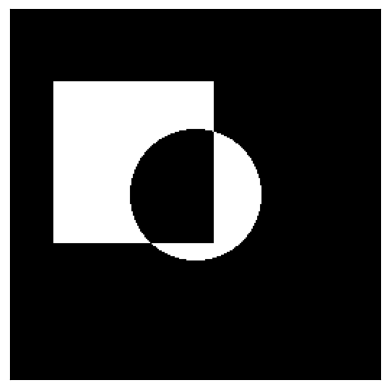

In [22]:
render_image(cv2.bitwise_not(square_image))
render_image(cv2.bitwise_not(circle_image))
render_image(cv2.bitwise_and(square_image, circle_image))
render_image(cv2.bitwise_or (square_image, circle_image))
render_image(cv2.bitwise_xor(square_image, circle_image))